<a href="https://colab.research.google.com/github/NgaanLee/DataAnalystDeepLearning/blob/main/Noidung_lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PHÂN LOẠI DỮ LIỆU VỚI SCIKIT-LEARN***

## 1. Mô tả dữ liệu IRIS cho bài toán phân loại:

- **Mô tả dữ liệu:** tập dữ liệu về hoa Iris gồm 3 loại: Silky, Virginica và Versicolor. Dữ liệu này tương ứng với chiều dài và chiều rộng của đài hoa (sepal) và cánh hóa (petal). Dữ liệu gồm có 150 dòng dữ liệu, mỗi dòng gồm có 4 cột ứng với chiều dài và chiều rộng của đài hoa và cánh 
hoa.

- Tập dữ liệu này hiện đang được sử dụng làm ví dụ điển hình cho nhiều loại phân tích, đặc biệt là 
đối với các vấn đề về phân loại, có thể được tiếp cận bằng cách phương pháp học máy

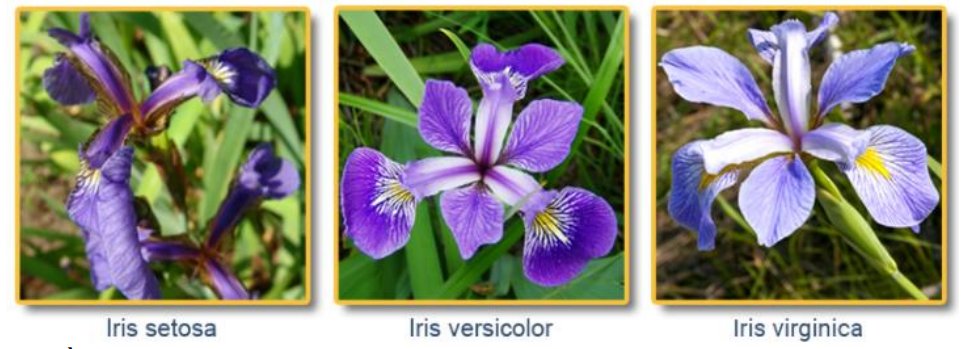

**Yêu cầu: xây dựng mô phân loại cho bài toán trên. Hướng dẫn thực hiện:**

In [1]:
# khai báo thư viện và load tập dữ liệu  
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
# Xem dữ liệu của iris
iris.data

In [ ]:
# Để biết loại hoa thuộc loại nào:
iris.target

In [4]:
# Để biết tên các loại hoa gồm những gì:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

([], <a list of 0 Text major ticklabel objects>)

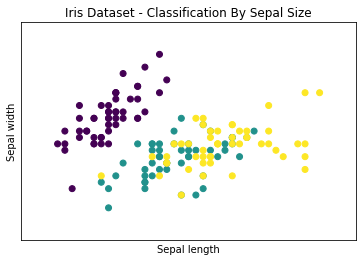

In [5]:
# Vẽ đồ thị vẽ 3 loại hoa với 3 màu khác nhau, trục x là chiều dài của đài hoa và trục y là chiều rộng của đài hoa:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,0] #X-Axis - sepal lenght
y = iris.data[:,1] #Y-Axis - sepal width
species = iris.target #species
x_min, x_max = x.min() - .5, x.max() + .5
y_min, y_max = y.min() - .5, y.max() + .5
#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Sepal Size')
plt.scatter(x,y, c=species)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

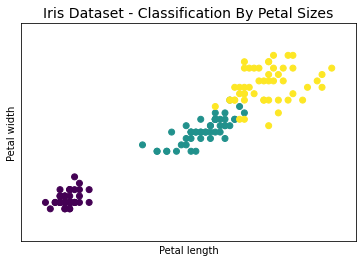

In [6]:
# Thực hiện tương tự với chiều dài và chiều rộng của cánh hoa ta có thêm 1 đồ thị:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,2] #X-Axis - petal lenght
y = iris.data[:,3] #Y-Axis - petal width
species = iris.target #species
x_min, x_max = x.min() - .5, x.max() + .5
y_min, y_max = y.min() - .5, y.max() + .5
#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Petal Sizes', size = 14)
plt.scatter(x,y, c=species)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 2. Kỹ thuật PCA Decomposition:

Chúng ta vẽ 2 đồ thị để thể hiện đặc trưng của 3 loại hoa trên. Làm cách nào để thể hiện đặc 
trưng trên chỉ với 1 đồ thị? Ta giảm chiều của các đặc trưng trên nhưng vẫn giữ nguyên thông 
tin, kỹ thuật này gọi là kỹ thuật PCA (Principal Component Analysis). Trong trường hợp này, ta 
giảm từ 4 chiều thành 3 chiều và sau đó trực quan hóa trên đồ thị 3D.

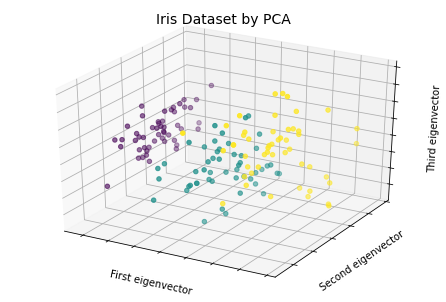

In [7]:
# Trong thư viện scikit-learn ta dùng hàm fit_transform() để chuyển từ 4 chiều thành 3 chiều.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
#x = iris.data[:,1] #X-Axis - sepal width
#y = iris.data[:,2] #Y-Axis - petal lenght
species = iris.target #species
x_reduced = PCA(n_components=3).fit_transform(iris.data)
#SCATTERPLOT 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size = 14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2], c=species)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

## 3. Phân loại với thuật toán K-Nearest Neighbors:

Bây giờ, chúng ta sẽ thực hiện phân loại với thư viện scikit-learn.
Nhiệm vụ của mô hình phân loại là tìm ra một loại hoa ta đưa vào để phân loại xem nó thuộc về loài nào trong ba loại. 

Ta phân chia tập ban đầu thành 2 tập dữ liệu, 1 tập là tập train và 1 tập là tập test.

Trong tập dữ liệu ban đầu, dữ liệu đã được sắp xếp theo loại. Do đó, trước khi phân chia tập dữ 
liệu này thành 2 tập, ta cần trộn dữ liệu lại. Dữ liệu sau khi trộn gồm 150 dòng, 140 dòng đầu 
cho tập train và 10 dòng sau cho tập test.



In [8]:
import numpy as np
from sklearn import datasets
np.random.seed(0)
iris = datasets.load_iris()
x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data))
x_train = x[i[:-10]]
y_train = y[i[:-10]]
x_test = x[i[-10:]]
y_test = y[i[-10:]]

In [9]:
# Bây giờ bạn có thể áp dụng thuật toán K-Nearest Neighbor để phân loại. Import thư viện 
# KNeighborsClassifier, gọi hàm KNeighborsClassifier(), sau đó huấn luyện nó với hàm fit ().
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
knn.predict(x_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [11]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

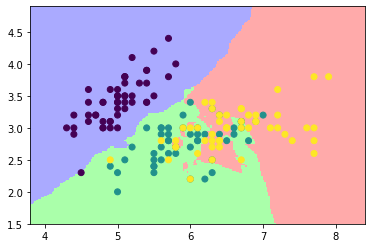

In [12]:
# Chúng ta so sánh giá trị ta dự báo từ mô hình so với tập dữ liệu thực tế, ta thấy lỗi 10%. 
# Trực quan hóa dữ liệu của đài hoa:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
x = iris.data[:,:2] #X-Axis - sepal lenght-width
y = iris.target #Y-Axis - species
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,
h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()